In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [100]:
#import data
df = pd.read_excel('data_Assignement2.xlsx')

#there are null values and wrong numbers in the data
df.describe()

,top_tube,seat_tube,chainstay,front_center,battery_weight,fullcharge_voltage,battery_capacity
count,9980.000000,9982.000000,9976.000000,9982.000000,9981.000000,9983.000000,9984.000000
mean,601.720707,583.082895,485.922563,632.979804,2.799980,35.891183,0.392826
std,8.571833,63.217698,104.990687,1.487150,0.004162,0.432642,0.028304
min,0.000000,-5677.870000,-9999.000000,627.840418,2.784446,34.088173,0.278370
25%,601.615610,583.254087,486.291845,632.571947,2.797191,35.953876,0.399264
50%,601.974009,583.937517,486.971322,632.983858,2.800008,35.994950,0.399943
75%,602.331737,584.602886,487.659514,633.396231,2.802749,36.034755,0.400550
max,604.929060,588.694467,490.802967,639.292068,2.814514,36.223812,0.403521


In [101]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=0)

In [102]:
#delete null values,because data is not sparse
df =df.dropna()
df.isnull().sum()

#delete Outliers
df = df.loc[df.loc[:, 'top_tube'] > 0]
df = df.loc[df.loc[:, 'seat_tube'] > 0]
df = df.loc[df.loc[:, 'chainstay'] > 0]


df.head()


,top_tube,seat_tube,chainstay,front_center,battery_weight,fullcharge_voltage,battery_capacity
0,598.197928,583.293170,488.182474,638.299804,2.801943,35.916003,0.399664
1,601.500351,583.659776,487.401430,632.241761,2.798991,36.045776,0.399095
2,602.229747,580.216681,487.570166,628.612997,2.797769,36.000287,0.399631
3,602.278077,583.142272,487.803049,633.549217,2.796853,35.996834,0.400181
4,601.498195,584.404954,487.125163,632.775715,2.793377,36.039253,0.398482


In [103]:
#add dataframe for "norm bike"
#norm bike has the exact attributes as given in the task description
data = [{"top_tube": 602, "seat_tube":584, "chainstay":487, "front_center":633, "battery_weight":2.8, "fullcharge_voltage":36, "battery_capacity":0.4}]

df_optimal_bike = pd.DataFrame(data)
df_optimal_bike

,top_tube,seat_tube,chainstay,front_center,battery_weight,fullcharge_voltage,battery_capacity
0,602,584,487,633,2.8,36,0.4


In [104]:
#copy of the df
df_test = df.copy()

#Assumption: the best bike produced is the bike which has the smallest deviation from the attribut values of the norm bike
#to find the "best bike" in the data a new dataframe is created
#the difference between the attribute values of each bike and the norm bike are being calculated
#the differences are squared and divided by the optimal value of the attribute, to make the deviation from norm attribut values comparable (and not negative)
df_test=(((df_test.loc[:,:]-df_optimal_bike.loc[0,:])**2)/df_test.loc[:,:])


# calculate the sum of each row 
df_test["sum"]= df_test.sum(axis=1)

#the min of the "sum" is the "best" bike produced
df_test.index[df_test["sum"]==df_test["sum"].min()].tolist()
df.iloc[9286,:]

#the best bike produed has the index 9286; validity check!!!

top_tube              602.274609
seat_tube             583.815974
chainstay             487.327382
front_center          633.656428
battery_weight          2.802947
fullcharge_voltage     36.032184
battery_capacity        0.400156
Name: 9303, dtype: float64

In [7]:
#scale values
df_scaled = (df - df.min()) / (df.max() - df.min())
df_scaled.describe()

,top_tube,seat_tube,chainstay,front_center,battery_weight,fullcharge_voltage,battery_capacity
count,9959.000000,9959.000000,9959.000000,9959.000000,9959.000000,9959.000000,9959.000000
mean,0.618030,0.505059,0.494542,0.448742,0.516590,0.844223,0.914500
std,0.117108,0.130555,0.133803,0.129823,0.138466,0.202666,0.226252
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.590218,0.450798,0.404580,0.413176,0.423824,0.873615,0.965985
50%,0.634492,0.519886,0.494254,0.449126,0.517502,0.892868,0.971413
75%,0.678734,0.586935,0.585050,0.485147,0.608711,0.911520,0.976267
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
from sklearn.decomposition import PCA

In [9]:
n_PC = 7
pca = PCA(n_components=n_PC, random_state=0)

In [10]:
PC = pca.fit_transform(df_scaled)

In [11]:
pca.explained_variance_
pca.explained_variance_ratio_

array([0.5195801 , 0.15757464, 0.10855217, 0.10102522, 0.08662396,
       0.02446811, 0.00217579])

Text(0, 0.5, 'Explained variance ratio')

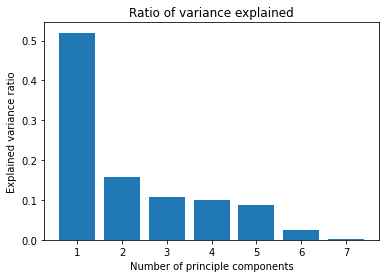

In [12]:
#plot explained variance ratio, to derive the best number of principal components
fig, ax = plt.subplots()
ax.bar([1,2,3,4,5,6,7], pca.explained_variance_ratio_)


ax.set_xticks([1,2,3,4,5,6,7])
ax.set_title('Ratio of variance explained')
ax.set_xlabel('Number of principle components')
ax.set_ylabel('Explained variance ratio')

# -> two principal component describe around 0.67% of variance; enough?

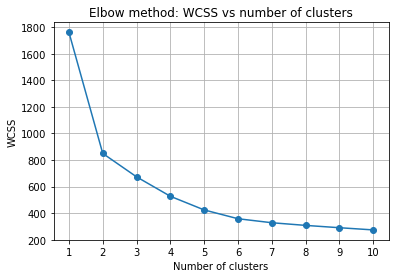

In [13]:
# Elbow method to find the right number of clusters
K_min, K_max = (1, 10)
WCSS_list = []

for K in range(K_min, K_max+1):
    kmeans.n_clusters = K    
    kmeans.fit(df_scaled)
    WCSS_list.append(kmeans.inertia_)
    
    
#### Plotting
fig, ax = plt.subplots()

ax.plot(range(K_min, K_max+1), WCSS_list, marker='o')

ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
ax.set_title('Elbow method: WCSS vs number of clusters')
ax.set_xticks(range(K_min, K_max+1))
ax.grid()

In [14]:
K = 4
kmeans.n_clusters = K
kmeans.fit(df_scaled)
df_scaled.loc[:, 'cluster'] = kmeans.labels_

In [15]:
#appending the PC values to the df
df_to_plot = df_scaled.copy()

df_to_plot.loc[:, 'PC_1'] = PC[:, 0]
df_to_plot.loc[:, 'PC_2'] = PC[:, 1]
df_to_plot.head()

,top_tube,seat_tube,chainstay,front_center,battery_weight,fullcharge_voltage,battery_capacity,cluster,PC_1,PC_2
0,0.167403,0.454716,0.654096,0.913352,0.581935,0.855870,0.969181,0,-0.054821,0.513453
1,0.575891,0.491726,0.550999,0.384341,0.483762,0.916636,0.964639,1,-0.086143,-0.034483
2,0.666112,0.144131,0.573272,0.067464,0.443109,0.895336,0.968924,3,-0.082056,-0.483087
3,0.672090,0.439482,0.604012,0.498513,0.412641,0.893719,0.973319,1,-0.075938,-0.024038
4,0.575624,0.566955,0.514532,0.430968,0.297026,0.913581,0.959741,1,-0.076818,0.041720


In [16]:
#create a new df with the standartized data of the best bike
df_best_bike=df_to_plot.iloc[9286,:]
df_best_bike= pd.DataFrame(df_best_bike).transpose()
df_best_bike

,top_tube,seat_tube,chainstay,front_center,battery_weight,fullcharge_voltage,battery_capacity,cluster,PC_1,PC_2
9303,0.671662,0.507495,0.541224,0.507875,0.615302,0.910272,0.973119,1.0,-0.0876,0.016659


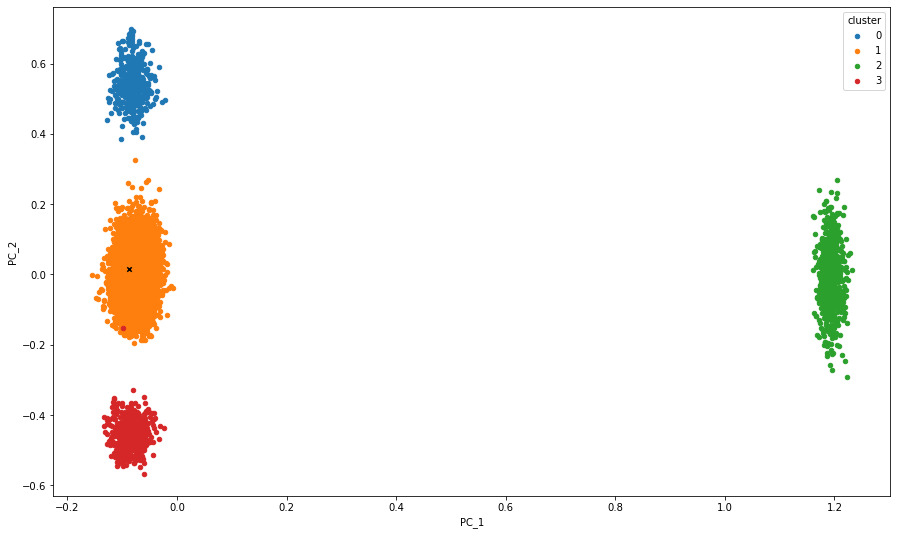

In [111]:
fig, ax = plt.subplots(figsize=(15, 9))

#plotting the data
for cluster in range(K):
    df_to_plot.groupby('cluster').get_group(cluster).plot.scatter('PC_1', 'PC_2', 
                                                                 color='C' + str(cluster),
                                                                 ax=ax, label=cluster)

#plotting the bike which is closest to the "norm bike"    
df_best_bike.plot.scatter('PC_1', 'PC_2', marker="x", ax=ax, color="black")
  
ax.legend(title='cluster')

# Descriptive Analytics of Clusters

In [105]:
df["top_tube"]=df["top_tube"]-602
df["top_tube"]=(df["top_tube"])**2
df["seat_tube"]=df["seat_tube"]-584
df["seat_tube"]=np.sqrt((df["seat_tube"]))
df["chainstay"]=df["chainstay"]-487
df["chainstay"]=np.sqrt((df["chainstay"]))
df["front_center"]= df["front_center"]-633
df["front_center"]=np.sqrt((df["front_center"]))
df["battery_weight"]=df["battery_weight"]-2.8
df["battery_weight"]=np.sqrt((df["battery_weight"]))
df["fullcharge_voltage"]=df["fullcharge_voltage"]-36
df["fullcharge_voltage"]=np.sqrt((df["fullcharge_voltage"]))
df["battery_capacity"]=df["battery_weight"]-0.4
df["battery_capacity"]=np.sqrt((df["battery_capacity"]))
df.head()

C:\Users\lucas\Programms\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,top_tube,seat_tube,chainstay,front_center,battery_weight,fullcharge_voltage,battery_capacity
0,14.455750,NaN,1.087416,2.302130,0.044083,NaN,NaN
1,0.249649,NaN,0.633585,NaN,NaN,0.213953,NaN
2,0.052784,NaN,0.755093,NaN,NaN,0.016939,NaN
3,0.077327,NaN,0.896130,0.741092,NaN,NaN,NaN
4,0.251809,0.63636,0.353784,NaN,NaN,0.198124,NaN


In [48]:
df.loc[:, 'cluster'] = kmeans.labels_
df_group = df.groupby("cluster")
df_cluster0 = df_group.get_group(0)
df_cluster1 = df_group.get_group(1)
df_cluster2 = df_group.get_group(2)
df_cluster3 = df_group.get_group(3)

df_cluster0.describe()


,top_tube,seat_tube,chainstay,front_center,battery_weight,fullcharge_voltage,battery_capacity,cluster
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.0
mean,598.028912,583.912551,486.929840,637.992072,2.799496,35.996585,0.399993,0.0
std,0.407256,0.892524,1.018786,0.408900,0.004216,0.053613,0.000849,0.0
min,596.844563,581.418253,483.588007,636.260720,2.784446,35.831384,0.397192,0.0
25%,597.751445,583.275875,486.263130,637.738596,2.796676,35.963768,0.399445,0.0
50%,598.033676,583.858027,486.884531,637.998347,2.799496,35.994032,0.400030,0.0
75%,598.293008,584.548072,487.565851,638.250943,2.802171,36.031916,0.400546,0.0
max,599.149735,586.244766,490.446330,639.292068,2.810245,36.144222,0.401993,0.0


In [49]:
df_cluster1.describe()

,top_tube,seat_tube,chainstay,front_center,battery_weight,fullcharge_voltage,battery_capacity,cluster
count,8398.000000,8398.000000,8398.000000,8398.000000,8398.000000,8398.000000,8398.000000,8398.0
mean,602.005123,584.017033,486.973388,632.995182,2.800022,36.000078,0.400004,1.0
std,0.485597,0.941665,1.013251,0.526380,0.004162,0.055453,0.000873,0.0
min,600.041161,580.228518,483.227181,631.073765,2.784940,35.777706,0.396743,1.0
25%,601.683735,583.379842,486.292032,632.641819,2.797237,35.962490,0.399415,1.0
50%,602.000336,584.018175,486.969755,632.994304,2.800043,35.999627,0.400018,1.0
75%,602.339571,584.648084,487.661953,633.348607,2.802804,36.037746,0.400596,1.0
max,603.819218,588.694467,490.802967,635.199291,2.814514,36.223812,0.403521,1.0


In [51]:
df_cluster2.describe()

,top_tube,seat_tube,chainstay,front_center,battery_weight,fullcharge_voltage,battery_capacity,cluster
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.0
mean,601.960922,584.006904,486.998354,632.998660,2.799693,34.198396,0.281245,2.0
std,0.978977,0.933452,1.008336,0.961716,0.004206,0.034226,0.000865,0.0
min,599.239595,581.402650,484.175763,629.699596,2.786907,34.088173,0.278370,2.0
25%,601.243550,583.362871,486.323413,632.318493,2.796907,34.176726,0.280680,2.0
50%,601.973932,583.984030,486.982009,633.037513,2.799787,34.197159,0.281252,2.0
75%,602.622589,584.647382,487.655751,633.701001,2.802511,34.221831,0.281817,2.0
max,604.929060,586.713380,489.865586,636.008261,2.813058,34.286935,0.283582,2.0


In [52]:
df_cluster3.describe()

,top_tube,seat_tube,chainstay,front_center,battery_weight,fullcharge_voltage,battery_capacity,cluster
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.0
mean,602.031716,580.035298,486.984496,629.003527,2.799990,36.001899,0.399918,3.0
std,0.463996,0.476191,1.023583,0.415629,0.004081,0.058077,0.000878,0.0
min,600.665244,578.788999,484.247025,627.840418,2.788773,35.802913,0.397248,3.0
25%,601.689153,579.788158,486.257734,628.775272,2.797038,35.962357,0.399324,3.0
50%,602.024997,579.994773,487.008012,629.000231,2.800050,36.004044,0.399887,3.0
75%,602.348696,580.207574,487.740810,629.250646,2.802585,36.040216,0.400573,3.0
max,603.317103,583.394499,489.882022,633.080281,2.811661,36.153299,0.402259,3.0


array([[<AxesSubplot:title={'center':'top_tube'}>,
        <AxesSubplot:title={'center':'seat_tube'}>,
        <AxesSubplot:title={'center':'chainstay'}>],
       [<AxesSubplot:title={'center':'front_center'}>,
        <AxesSubplot:title={'center':'battery_weight'}>,
        <AxesSubplot:title={'center':'fullcharge_voltage'}>],
       [<AxesSubplot:title={'center':'battery_capacity'}>,
        <AxesSubplot:title={'center':'cluster'}>, <AxesSubplot:>]],
      dtype=object)

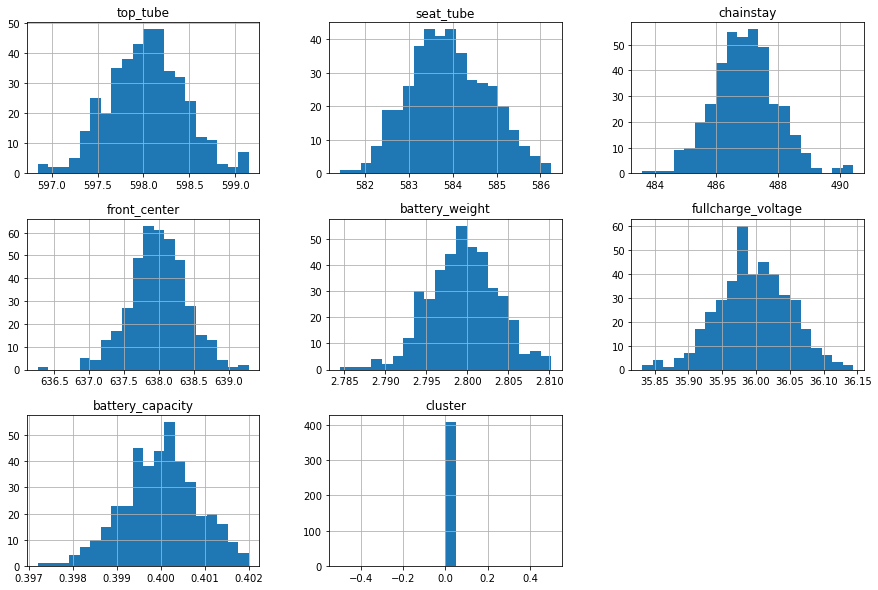

In [55]:
df_cluster0.hist(figsize=(15,10),bins=20)

array([[<AxesSubplot:title={'center':'top_tube'}>,
        <AxesSubplot:title={'center':'seat_tube'}>,
        <AxesSubplot:title={'center':'chainstay'}>],
       [<AxesSubplot:title={'center':'front_center'}>,
        <AxesSubplot:title={'center':'battery_weight'}>,
        <AxesSubplot:title={'center':'fullcharge_voltage'}>],
       [<AxesSubplot:title={'center':'battery_capacity'}>,
        <AxesSubplot:title={'center':'cluster'}>, <AxesSubplot:>]],
      dtype=object)

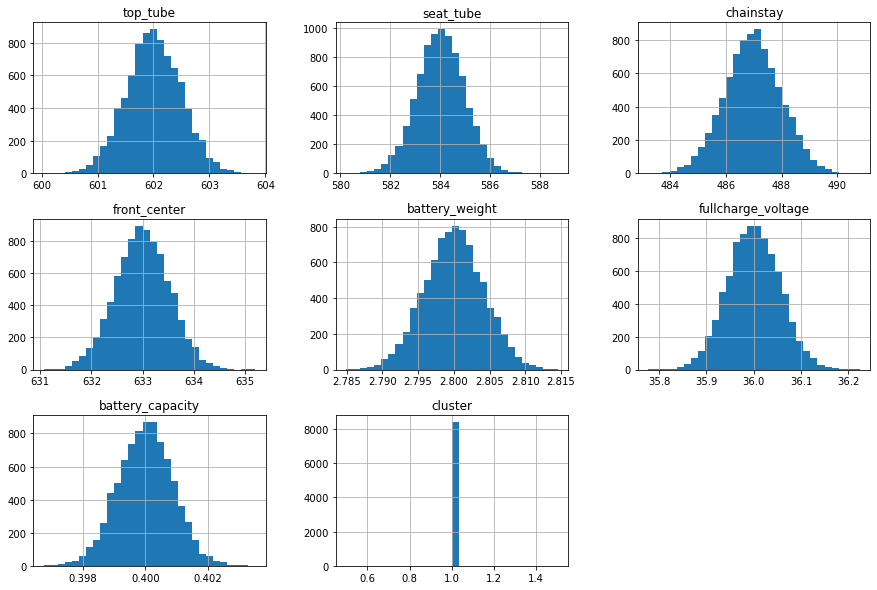

In [36]:
df_cluster1.hist(figsize=(15,10),bins=20)

array([[<AxesSubplot:title={'center':'top_tube'}>,
        <AxesSubplot:title={'center':'seat_tube'}>,
        <AxesSubplot:title={'center':'chainstay'}>],
       [<AxesSubplot:title={'center':'front_center'}>,
        <AxesSubplot:title={'center':'battery_weight'}>,
        <AxesSubplot:title={'center':'fullcharge_voltage'}>],
       [<AxesSubplot:title={'center':'battery_capacity'}>,
        <AxesSubplot:title={'center':'cluster'}>, <AxesSubplot:>]],
      dtype=object)

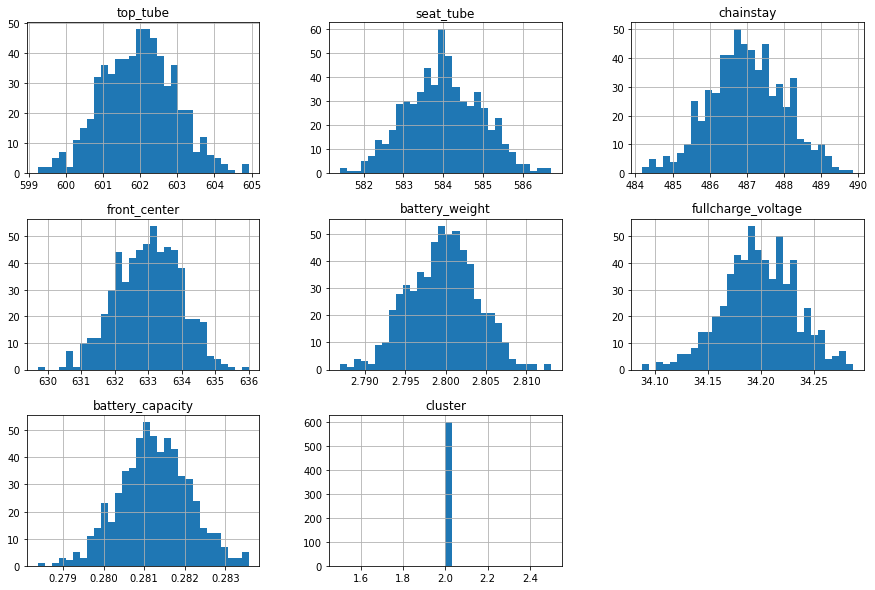

In [37]:
df_cluster2.hist(figsize=(15,10),bins=20)

array([[<AxesSubplot:title={'center':'top_tube'}>,
        <AxesSubplot:title={'center':'seat_tube'}>,
        <AxesSubplot:title={'center':'chainstay'}>],
       [<AxesSubplot:title={'center':'front_center'}>,
        <AxesSubplot:title={'center':'battery_weight'}>,
        <AxesSubplot:title={'center':'fullcharge_voltage'}>],
       [<AxesSubplot:title={'center':'battery_capacity'}>,
        <AxesSubplot:title={'center':'cluster'}>, <AxesSubplot:>]],
      dtype=object)

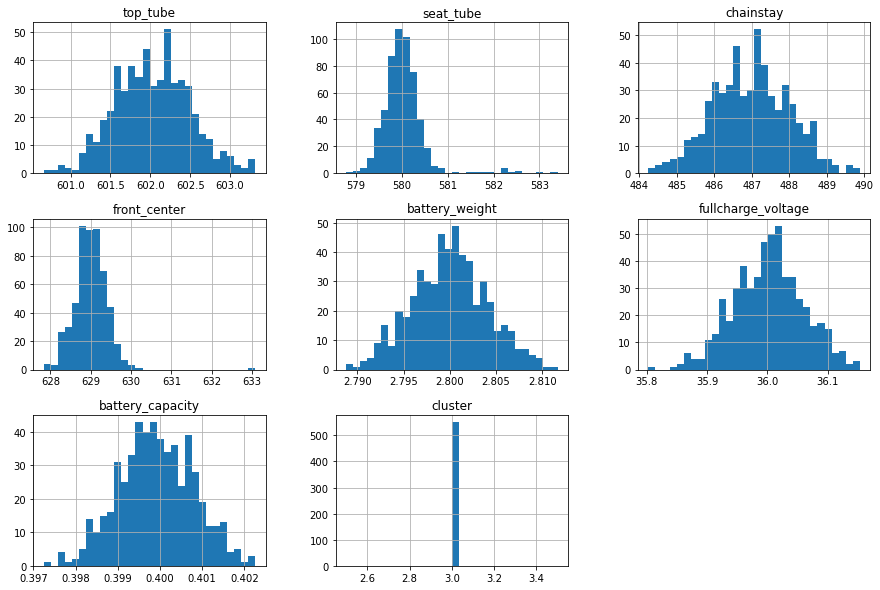

In [38]:
df_cluster3.hist(figsize=(15,10),bins=20)

# Calcualte MAE (Mean average Error)

In [73]:

df_group = df_scaled.groupby("cluster")
df_cluster0 = df_group.get_group(0)
df_cluster1 = df_group.get_group(1)
df_cluster2 = df_group.get_group(2)
df_cluster3 = df_group.get_group(3)

#cluster0 --> Best Quality
MAE0_col = (np.sum(df_cluster0)/len(df_cluster0))
MAE0 = np.sum(MAE0_col)
print(MAE0_col)
print("The MAE for every bike in cluster 0 is : ", MAE0)

top_tube              0.146496
seat_tube             0.517245
chainstay             0.488749
front_center          0.886480
battery_weight        0.500548
fullcharge_voltage    0.893602
battery_capacity      0.971815
cluster               0.000000
dtype: float64
The MAE for every bike in cluster 0 is :  4.404935461112149


In [74]:
#cluster1 
MAE1_col = (np.sum(df_cluster1)/len(df_cluster1))
MAE1 = np.sum(MAE1_col)
print(MAE1_col)
MAE1
print("The MAE for every bike in cluster 1 is : ", MAE1)

top_tube              0.638328
seat_tube             0.527793
chainstay             0.494497
front_center          0.450133
battery_weight        0.518026
fullcharge_voltage    0.895238
battery_capacity      0.971903
cluster               1.000000
dtype: float64
The MAE for every bike in cluster 0 is :  5.495918219481126


In [75]:
#cluster2
MAE2_col = (np.sum(df_cluster2)/len(df_cluster2))
MAE2 = np.sum(MAE2_col)
print(MAE2_col)
print("The MAE for every bike in cluster 2 is : ", MAE2)

top_tube              0.632861
seat_tube             0.526770
chainstay             0.497793
front_center          0.450437
battery_weight        0.507096
fullcharge_voltage    0.051611
battery_capacity      0.022971
cluster               2.000000
dtype: float64
The MAE for every bike in cluster 0 is :  4.689538262849774


In [76]:
#cluster3 --> worst Quality
MAE3_col = (np.sum(df_cluster3)/len(df_cluster3))
MAE3 = np.sum(MAE3_col)
print(MAE3_col)
print("The MAE for every bike in cluster 3 is : ", MAE3)

top_tube              0.641617
seat_tube             0.125819
chainstay             0.495964
front_center          0.101567
battery_weight        0.516954
fullcharge_voltage    0.896091
battery_capacity      0.971213
cluster               3.000000
dtype: float64
The MAE for every bike in cluster 3 is :  6.749225742011694
